In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

### Data ejercicio 25, 59

In [ ]:
logs = pd.read_csv("/content/gdrive/MyDrive/Data/logs.csv", usecols=["contributor_username","contributor_ip",'contributor_id','logtype',"timestamp","title","comment",], dtype={'logtype':'category'})

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data ejercicios: 6, 7, 8, 59

In [ ]:
contents = pd.read_csv("/content/gdrive/MyDrive/Data/contents.csv",usecols=['revisor_id','revisor_comment',"title","revision_timestamp"])

### Data ejercicio 59

In [ ]:
languajes = pd.read_csv("/content/gdrive/MyDrive/Data/languages.csv")

### Data Ejercicio 46


In [ ]:
geo_tags = pd.read_csv("/content/gdrive/MyDrive/Data/geo_tags.csv")

In [ ]:
category_links = pd.read_csv("/content/gdrive/MyDrive/Data/categorylinks.csv", usecols=["cl_from","cl_to"])

### Data Visus

In [ ]:
meli = pd.read_parquet("/content/gdrive/MyDrive/Data/train_data.parquet", engine='pyarrow')

In [ ]:
df_soja = pd.read_csv("/content/gdrive/MyDrive/Data/soja_dataset.csv")

In [ ]:
df_clients = pd.read_csv("/content/gdrive/MyDrive/Data/clients.csv")

# Primera parte - Pandas

## 25. ¿Quién es el usuario que más ha bloqueado a otros? (⭐)


In [ ]:
logs_25 = logs[["contributor_id","logtype"]]

In [ ]:
logs_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12188946 entries, 0 to 12188945
Data columns (total 2 columns):
 #   Column          Dtype   
---  ------          -----   
 0   contributor_id  float64 
 1   logtype         category
dtypes: category(1), float64(1)
memory usage: 104.6 MB


In [ ]:
logs_25['logtype'].value_counts()

newusers             6218005
delete               2493381
create               1322454
move                  959976
block                 353824
patrol                257425
thanks                241948
renameuser            204444
protect               102766
upload                 15844
tag                     5290
eparticle               4805
rights                  3774
student                 2803
course                   996
massmessage              472
instructor               250
growthexperiments        141
import                   130
online                    82
campus                    42
institution               34
contentmodel              25
merge                     21
managetags                 5
gblrights                  4
usermerge                  2
gblblock                   1
Name: logtype, dtype: int64

In [ ]:
logs_blockers = logs_25.loc[logs_25['logtype']=='block']

In [ ]:
logs_blockers.head()

,contributor_id,logtype
5,13770.0,block
287,13770.0,block
288,13770.0,block
290,13770.0,block
313,9305.0,block


In [ ]:
logs_blockers.isnull().sum()

contributor_id    64
logtype            0
dtype: int64

In [ ]:
logs_blockers = logs_blockers.value_counts()

In [ ]:
logs_blockers.nlargest(1)

contributor_id  logtype
34991.0         block      30155
dtype: int64

## 6 El porcentaje de contenidos que están publicados cuya última edición no tiene comentario para los usuarios que realizaron 1, >10 y >100 de las últimas ediciones (⭐⭐)

In [ ]:
contents_6 = contents[['revisor_id','revisor_comment']]

In [ ]:
contents_6["revisiones"] = contents_6.revisor_id.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
contents_6 = contents_6[(contents_6["revisiones"]==1) | (contents_6["revisiones"] > 10) | (contents_6["revisiones"] > 100)]

In [ ]:
conditions = [
    contents_6["revisiones"]==1,
    contents_6["revisiones"]>100,
    contents_6["revisiones"]>10,
    ]

values = ['Eq_1', 'May_100','May_10']

contents_6['q_revisiones'] = np.select(conditions, values)

In [ ]:
contents_6['bool_revisiones'] = np.where(contents_6['revisor_comment'].isnull(), 0,1)

In [ ]:
contents_6 = contents_6[['q_revisiones','bool_revisiones']].value_counts().to_frame('totales_coment').reset_index()

In [ ]:
contents_totales = contents_6.groupby('q_revisiones').transform('sum')

In [ ]:
contents_totales.columns = ['test','total']

In [ ]:
contents_6['resultado'] = contents_6['totales_coment']/contents_totales['total']*100

In [ ]:
contents_6 = contents_6.loc[contents_6['bool_revisiones']==0,['q_revisiones','resultado']]

In [ ]:
contents_6

,q_revisiones,resultado
2,Eq_1,12.543347
4,May_10,13.890696
5,May_100,14.204545


## 7. La antigüedad promedio de la última edición de los artículos cuyo título contenga tu apellido (si no hay, tu nombre y si tampoco hay usa Cafferata) (⭐⭐)

In [ ]:
contents_7 =contents[["title","revision_timestamp"]]

In [ ]:
contents_7.title.str.contains('Bianchi', regex=False).value_counts()

False    4131971
True         189
Name: title, dtype: int64

In [ ]:
contents_bianchi = contents_7[contents_7["title"].str.contains("Bianchi",na=False)]

In [ ]:
contents_bianchi['revision_timestamp']=pd.to_datetime(contents_bianchi['revision_timestamp'],format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
contents_bianchi.revision_timestamp.mean()

Timestamp('2017-11-08 20:35:53.746031360+0000', tz='UTC')

## 8. La mediana de la antigüedad para las últimas ediciones vigentes agrupado por el primer carácter del título (⭐⭐)

In [ ]:
contents_8 = contents[['revision_timestamp','title']]

In [ ]:
contents_8.head()

,revision_timestamp,title
0,2021-01-19T18:40:34Z,Wikipedia:Artículos solicitados
1,2021-08-31T18:27:01Z,Andorra
2,2021-08-28T17:17:54Z,Argentina
3,2021-08-29T17:16:00Z,Geografía de Andorra
4,2020-11-12T19:56:15Z,Demografía de Andorra


In [ ]:
contents_8['revision_timestamp']=pd.to_datetime(contents_8['revision_timestamp'],format='%Y-%m-%d', utc=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
contents_8["primer_caracter"]= contents_8["title"].str[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
contents_8["fecha_actual"] = datetime.today()

In [ ]:
contents_8['fecha_actual']=pd.to_datetime(contents_8['fecha_actual'],format='%Y-%m-%d', utc=True)

In [ ]:
contents_8["diff_dias"] = (contents_8["fecha_actual"] - contents_8["revision_timestamp"]).dt.days

In [ ]:
contents_8.groupby('primer_caracter').median()

,diff_dias
primer_caracter,
!,245.5
"""",350.5
$,83.5
%,110.5
&,459.5
...,...
💣,2193.0
🚀,2799.0
🧆,934.0


## 58. Observe una muestra aleatoria de los comentarios de las acciones realizadas por usuarios o ips antes de ser bloqueados. Observe otra muestra de comentarios de acciones de todos. (⭐⭐)

In [ ]:
logs_58 = logs

In [ ]:
logs_58.head(10)

,timestamp,contributor_username,contributor_id,contributor_ip,comment,logtype,title
0,2004-12-23T07:10:09Z,Sabbut,2075.0,NaN,el contenido era: 'Si aprendés Pensamiento Cie...,delete,Verificacionismo
1,2004-12-23T07:14:09Z,Sabbut,2075.0,NaN,el contenido era: '{{destruir}}en algun lugar ...,delete,Rapunzel
2,2004-12-23T07:26:10Z,Sabbut,2075.0,NaN,el contenido era: '#REDIRECT [[Flash]]',delete,Macromedia Flash
3,2004-12-23T07:55:09Z,Sanbec,7856.0,NaN,Sin información de origen ni de licencia. Hay ...,delete,Archivo:Gnu head.png
4,2004-12-23T08:02:22Z,Sanbec,7856.0,NaN,Sustituida por [[commons:Image:Heckert_GNU.png]],delete,Archivo:Gnu-head-sm.jpg
5,2004-12-23T08:28:32Z,Dodo,13770.0,NaN,vandalismo grosero,block,Usuario:212.55.30.157
6,2004-12-23T12:10:06Z,Antoine,22532.0,NaN,"Logotipo Comuna de La Florida, derecho público...",upload,Archivo:La florida.jpg
7,2004-12-23T12:12:15Z,Antoine,22532.0,NaN,Fotografía aérea instantánea de los videos de ...,upload,Archivo:La florida uoct.jpg
8,2004-12-23T12:13:43Z,Antoine,22532.0,NaN,"Pablo Zalaquett, Alcalde de La Florida {{PD}}",upload,Archivo:Pablo zalaquett.jpg
9,2004-12-23T12:23:54Z,Sanbec,7856.0,NaN,Está en commons,delete,Archivo:Szymborska znaczek.jpg


In [ ]:
logs_58['ids_bloqueados'] = np.where(logs_58['logtype']=="block", logs_58.title.str[8:], None)

In [ ]:
logs_58['ids_bloqueados'].isnull().value_counts()

True     11835553
False      353393
Name: ids_bloqueados, dtype: int64

In [ ]:
logs_58_test = logs_58.dropna(subset=["ids_bloqueados"])

In [ ]:
logs_58_merged = logs_58.merge(logs_58_test, left_on='contributor_username', right_on='ids_bloqueados',how='inner')[['contributor_username_x',"comment_x"]]

In [ ]:
logs_58_merged.head()

,contributor_username_x,comment_x
0,Sabbut,el contenido era: 'Si aprendés Pensamiento Cie...
1,Sabbut,el contenido era: 'Si aprendés Pensamiento Cie...
2,Sabbut,el contenido era: '{{destruir}}en algun lugar ...
3,Sabbut,el contenido era: '{{destruir}}en algun lugar ...
4,Sabbut,el contenido era: '#REDIRECT [[Flash]]'


## 59. ¿Cuál es el idioma para el cual sus usuarios realizan más agradecimientos en promedio? ¿Y el de menos agradecimientos? Calcule lo mismo para quienes reciben agradecimientos. (⭐⭐⭐)


In [ ]:
logs_59 = logs

In [ ]:
logs_59.head()

,timestamp,contributor_username,contributor_id,contributor_ip,comment,logtype,title
0,2004-12-23T07:10:09Z,Sabbut,2075.0,NaN,el contenido era: 'Si aprendés Pensamiento Cie...,delete,Verificacionismo
1,2004-12-23T07:14:09Z,Sabbut,2075.0,NaN,el contenido era: '{{destruir}}en algun lugar ...,delete,Rapunzel
2,2004-12-23T07:26:10Z,Sabbut,2075.0,NaN,el contenido era: '#REDIRECT [[Flash]]',delete,Macromedia Flash
3,2004-12-23T07:55:09Z,Sanbec,7856.0,NaN,Sin información de origen ni de licencia. Hay ...,delete,Archivo:Gnu head.png
4,2004-12-23T08:02:22Z,Sanbec,7856.0,NaN,Sustituida por [[commons:Image:Heckert_GNU.png]],delete,Archivo:Gnu-head-sm.jpg


In [ ]:
languajes_59 = languajes[["babel_user","babel_lang"]]

In [ ]:
logs_59.logtype.value_counts()

newusers             6218005
delete               2493381
create               1322454
move                  959976
block                 353824
patrol                257425
thanks                241948
renameuser            204444
protect               102766
upload                 15844
tag                     5290
eparticle               4805
rights                  3774
student                 2803
course                   996
massmessage              472
instructor               250
growthexperiments        141
import                   130
online                    82
campus                    42
institution               34
contentmodel              25
merge                     21
managetags                 5
gblrights                  4
usermerge                  2
gblblock                   1
Name: logtype, dtype: int64

In [ ]:
languajes_59.head()

,babel_user,babel_lang
0,4502458,FR
1,5928200,aa
2,46918,ab
3,2050449,ab
4,4715583,ace


In [ ]:
test = logs_59.merge(languajes_59, left_on="contributor_id", right_on="babel_user", how="inner")[["contributor_id","babel_lang","logtype"]]

In [ ]:
test.head()

,contributor_id,babel_lang,logtype
0,2075.0,en,delete
1,2075.0,es,delete
2,2075.0,fr,delete
3,2075.0,ja,delete
4,2075.0,en,delete


In [ ]:
total_idioma = test.babel_lang.value_counts().to_frame().reset_index()
total_idioma

,index,babel_lang
0,es,1692487
1,en,1657717
2,fr,825523
3,pt,283931
4,it,282633
...,...,...
312,FR,1
313,frr,1
314,pag,1
315,ilo,1


In [ ]:
total_idioma.columns = ["idioma","cantidad_total"]

In [ ]:
total_idioma.head()

,idioma,cantidad_total
0,es,1692487
1,en,1657717
2,fr,825523
3,pt,283931
4,it,282633


In [ ]:
thank_idioma = test.loc[test.logtype=="thanks"].babel_lang.value_counts().to_frame().reset_index()

In [ ]:
thank_idioma.head()

,index,babel_lang
0,es,76140
1,en,69347
2,fr,28320
3,pt,18384
4,ca,14022


In [ ]:
thank_idioma.columns = ["idioma","cantidad_bloqueados"]

In [ ]:
test_final = thank_idioma.merge(total_idioma, left_on="idioma", right_on="idioma", how="inner")

In [ ]:
test_final.head()

,idioma,cantidad_bloqueados,cantidad_total
0,es,76140,1692487
1,en,69347,1657717
2,fr,28320,825523
3,pt,18384,283931
4,ca,14022,230887


In [ ]:
test_final["promedio"] = test_final["cantidad_bloqueados"]/test_final["cantidad_total"]

In [ ]:
test_final.sort_values("promedio")

,idioma,cantidad_bloqueados,cantidad_total,promedio
164,gsw,1,656,0.001524
126,io,4,1665,0.002402
137,ugy,2,392,0.005102
24,nl,657,91572,0.007175
189,guc,1,100,0.010000
...,...,...,...,...
98,pcd,25,35,0.714286
93,mn,25,35,0.714286
96,pnt,25,34,0.735294
74,ise,32,33,0.969697


In [ ]:
test_final.nlargest(1, 'promedio')

,idioma,cantidad_bloqueados,cantidad_total,promedio
74,ise,32,33,0.969697


In [ ]:
test_final.nsmallest(1, 'promedio')

,idioma,cantidad_bloqueados,cantidad_total,promedio
164,gsw,1,656,0.001524


## 46. Si decimos que la ubicación de una categoría es el promedio de la latitud y longitud de sus contenidos geolocalizados que son miembros de ella (si es que tiene): ¿Cuales son las dos categorías más cercanas? (⭐⭐⭐)

In [ ]:
geo_46 = geo_tags

In [ ]:
category_46 = category_links

In [ ]:
geo_46.head()

,gt_id,gt_page_id,gt_globe,gt_primary,gt_lat,gt_lon,gt_dim,gt_type,gt_name,gt_country,gt_region
0,158041,4328020,earth,0,41.5075,-5.8175,1000,NaN,NaN,NaN,NaN
1,5844377,4670424,earth,0,13.7380,-89.2920,10000,city,NaN,NaN,NaN
2,5844381,4670424,earth,0,13.7020,-89.2080,10000,city,NaN,NaN,NaN
3,5844383,4670424,earth,0,13.4000,-89.7500,10000,city,NaN,NaN,NaN
4,5844388,4670424,earth,0,12.8500,-88.0000,10000,city,NaN,NaN,NaN


In [ ]:
category_46.head()

,cl_from,cl_to
0,5,Wikipedia:Mantenimiento
1,5,Wikipedia:PÃ¡ginas_con_enlaces_mÃ¡gicos_de_ISBN
2,7,Andorra
3,7,Instituciones_patrocinadoras_de_equipos_ciclistas
4,7,Wikipedia:ArtÃ­culos_con_datos_locales


In [ ]:
geo_category_46 = geo_46.merge(category_46, left_on="gt_page_id", right_on="cl_from", how="inner")[["cl_from","gt_lat","gt_lon","cl_to"]]

In [ ]:
geo_category_46['cl_from']=geo_category_46['cl_from'].astype(str)

In [ ]:
geo_category_46_grouped = geo_category_46.groupby('cl_to').sum().reset_index()

In [ ]:
geo_category_46_grouped["prom_lat_lon"] = (geo_category_46_grouped['gt_lat'] + geo_category_46_grouped['gt_lon']) / 2

In [ ]:
geo_category_46_array = np.unique(geo_category_46_grouped.prom_lat_lon.to_numpy())
geo_category_46_array= geo_category_46_array[np.where(geo_category_46_array != 0)]

In [ ]:
def test_v3(array):
  val_1 = array[0]
  val_2 = array[1]
  min_dif = (val_1-val_2)**2
  for i in array:
    dif = (i-array[np.abs(array-i).argsort()[1]])**2
    if dif<min_dif:
      min_dif = dif
      val_1 = i
      val_2 = array[np.abs(array-i).argsort()[1]]

  return sqrt(min_dif), val_1, val_2
test_v3(geo_category_46_array)

(8.881784197001252e-16, 2.05, 2.0500000000000007)

In [ ]:
geo_category_46_grouped.loc[(geo_category_46_grouped["prom_lat_lon"]==2.0500000000000007) |(geo_category_46_grouped["prom_lat_lon"]==2.05)][["cl_to","prom_lat_lon"]]

,cl_to,prom_lat_lon
2952,AfrotrÃ³pico,2.05
51820,Ghana_en_1992,2.05
92710,Reservas_de_la_biosfera_de_SudÃ¡frica,2.05


# Segunda parte - Visualización de datos

## Visus MeLi

In [ ]:
meli_grafico = meli

In [ ]:
meli_grafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37660279 entries, 0 to 37660278
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   sku                     int64         
 1   date                    datetime64[ns]
 2   sold_quantity           int64         
 3   current_price           float64       
 4   currency                object        
 5   listing_type            object        
 6   shipping_logistic_type  object        
 7   shipping_payment        object        
 8   minutes_active          float64       
 9   mes                     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 2.8+ GB


In [ ]:
meli_grafico['date']=pd.to_datetime(meli_grafico['date'],format='%Y-%m-%d')

In [ ]:
meli_grafico["mes"] = meli_grafico.date.dt.month

In [ ]:
meli_grafico.mes.value_counts()

Marzo      20208262
Febrero    17452017
Name: mes, dtype: int64

In [ ]:
meli_grafico['mes'] = np.where(meli_grafico['mes']==3, "Marzo","Febrero")

<Figure size 1800x1200 with 0 Axes>

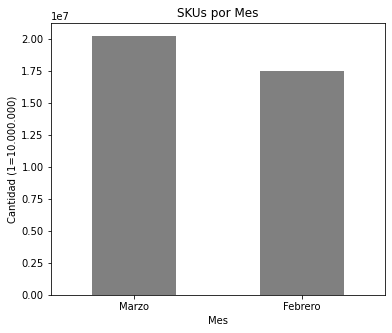

<Figure size 1800x1200 with 0 Axes>

In [ ]:
meli_grafico.mes.value_counts().plot(kind='bar',figsize=(6,5),title='SKUs por Mes',color='grey')
plt.xticks(rotation=360)
plt.xlabel("Mes")
plt.ylabel("Cantidad (1=10.000.000)")
plt.figure(dpi=300)

In [ ]:
meli_productos = meli[["currency","current_price","sold_quantity"]]

In [ ]:
meli_productos['currency']=meli_productos['currency'].astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
conditions = [
    meli_productos["currency"]=="REA",
    meli_productos["currency"]=="MEX",
    meli_productos["currency"]=="ARG",
    meli_productos["currency"]=="DOL",
    ]
values = [5.52,20.77, 98.86,1]

meli_productos['tipo_cambio'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
meli_productos["price_usd"] = meli_productos["current_price"]/meli_productos['tipo_cambio']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
meli_productos['price_usd']=meli_productos['price_usd'].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
meli_productos = meli_productos.loc[meli_productos['price_usd'] < meli_productos.price_usd.quantile(.9) ]

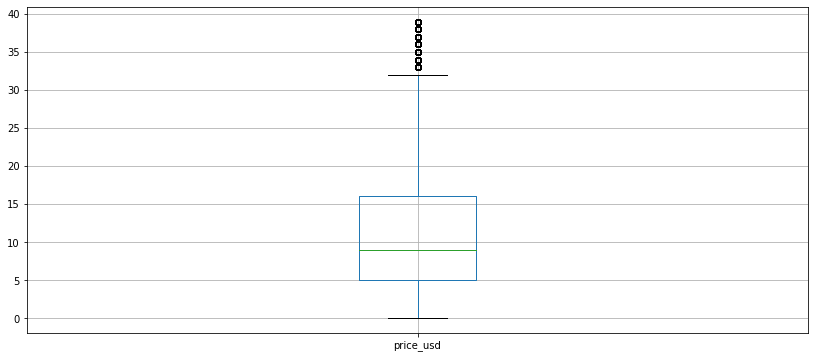

In [ ]:
meli_productos.boxplot(column='price_usd',figsize=(14,6))

In [ ]:
meli_productos['sold'] = np.where(meli_productos.sold_quantity==0, "No vendido","Vendido")

In [ ]:
meli_productos.head()

,currency,current_price,sold_quantity,tipo_cambio,price_usd,sold
0,REA,156.78,0,5.52,28,No vendido
1,REA,156.78,0,5.52,28,No vendido
2,REA,156.78,0,5.52,28,No vendido
3,REA,156.78,0,5.52,28,No vendido
4,REA,156.78,1,5.52,28,Vendido


In [ ]:
meli_valores = meli_productos.groupby('sold').mean()

In [ ]:
meli_valores.head()

,current_price,sold_quantity,tipo_cambio,price_usd
sold,,,,
No vendido,237.302158,0.000000,18.425682,11.835985
Vendido,227.715254,3.768807,18.471775,11.370984


Text(0, 0.5, 'Mes')

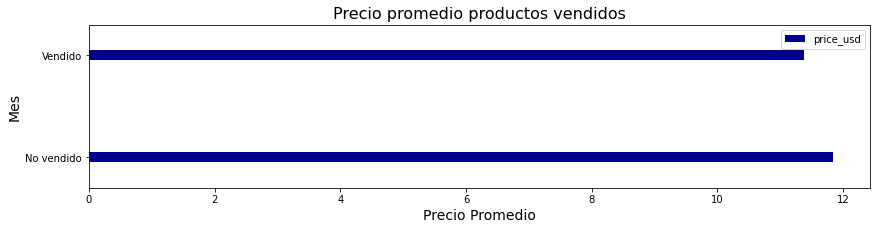

In [ ]:
graf = meli_valores.plot(kind='barh', y=['price_usd'],figsize=(14, 3),width=0.1,color="darkblue",)
graf.set_title("Precio promedio productos vendidos", fontsize=16)
graf.set_xlabel("Precio Promedio",fontsize=14)
graf.set_ylabel("Mes",fontsize=14)

## Visu Soja

In [ ]:
df_soja.head()

,Id,Fecha,Open,High,Low,Last,Cierre,Aj.Dif.,Mon.,OI.Vol.,OI.Dif.,Vol.Ope.,Unidad,DolarB.N.,DolarItau.,Dif.Sem
0,1,05/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,13.0,D,0,0,0,TONS,2.92,2.905,-221.0
1,2,06/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,0.0,D,0,0,0,TONS,2.88,2.87,-221.0
2,3,07/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,219.0,-2.0,D,0,0,0,TONS,2.865,2.882,-219.0
3,4,08/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,1.0,D,0,0,0,TONS,2.887,2.884,-220.0
4,5,09/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,0.0,D,0,0,0,TONS,2.892,2.9,-220.0


In [ ]:
df_soja['month'] = pd.DatetimeIndex(df_soja['Fecha']).month
df_soja['year'] = pd.DatetimeIndex(df_soja['Fecha']).year
df_soja.head()

,Id,Fecha,Open,High,Low,Last,Cierre,Aj.Dif.,Mon.,OI.Vol.,OI.Dif.,Vol.Ope.,Unidad,DolarB.N.,DolarItau.,Dif.Sem,month,year
0,1,05/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,13.0,D,0,0,0,TONS,2.92,2.905,-221.0,5,2004
1,2,06/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,221.0,0.0,D,0,0,0,TONS,2.88,2.87,-221.0,6,2004
2,3,07/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,219.0,-2.0,D,0,0,0,TONS,2.865,2.882,-219.0,7,2004
3,4,08/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,1.0,D,0,0,0,TONS,2.887,2.884,-220.0,8,2004
4,5,09/01/2004 12:00:00 a.m.,0.0,0.0,0.0,0.0,220.0,0.0,D,0,0,0,TONS,2.892,2.9,-220.0,9,2004


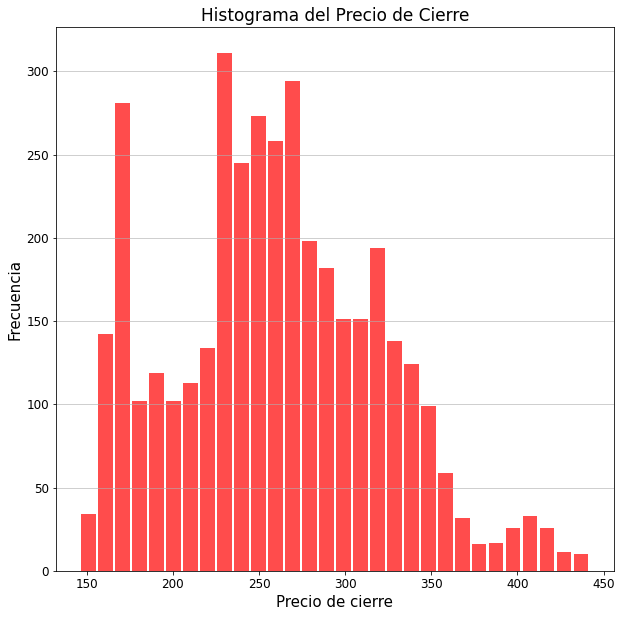

<Figure size 1800x1200 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(x=df_soja.Cierre, bins='auto', color='red',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Precio de cierre', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.title('Histograma del Precio de Cierre', fontsize=17)
plt.figure(dpi=300)
maxfreq = n.max()

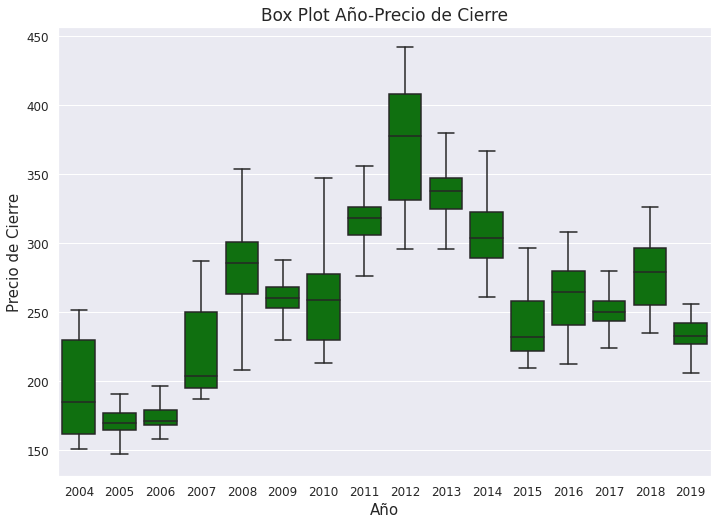

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='year', y='Cierre', data=df_soja, fliersize=0, linewidth=1.5, color="green")
ax.axes.set_title("Box Plot Año-Precio de Cierre",fontsize=17)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio de Cierre",fontsize=15)
ax.tick_params(labelsize=12)

## Visu Clients

In [ ]:
df_clients.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [ ]:
df_clients[['YEAR','MONTH']] = df_clients['Month'].str.split('-',expand=True)
df_clients.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,YEAR,MONTH
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,2016,5
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,2016,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,2016,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,2018,2
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,2018,2


In [ ]:
pivot = df_clients.pivot_table(index='YEAR', columns='MONTH', values='ASP')

In [ ]:
pivot

MONTH,1,10,11,12,2,3,4,5,6,7,8,9
YEAR,,,,,,,,,,,,
2016,18.386430,8.007492,6.897197,8.476267,27.536333,28.559061,10.913111,11.176270,10.206162,7.740911,11.669158,20.965285
2017,7.568737,6.783200,5.232314,9.239457,12.759298,9.467541,5.707889,5.503777,3.699802,4.966629,4.477312,4.316869
2018,3.011980,2.318132,3.514275,6.316083,3.993484,3.128848,5.275407,3.629545,5.586056,1.967940,3.404467,4.995185
2019,5.470492,26.296364,40.000000,43.000000,3.339057,12.889419,4.643293,6.909167,14.800014,2.113979,8.264500,41.500000
2020,18.996429,NaN,NaN,NaN,NaN,40.000000,40.666667,NaN,40.000000,NaN,NaN,0.290000


<Figure size 3510x2481 with 0 Axes>

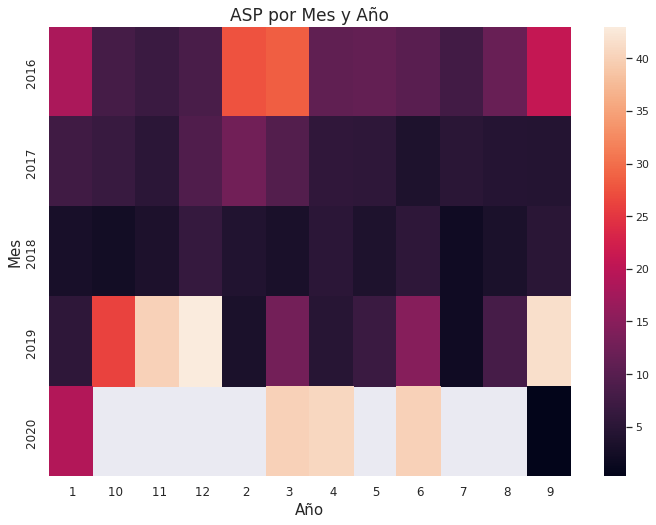

<Figure size 3510x2481 with 0 Axes>

In [ ]:
sns.set()
ax = sns.heatmap(pivot)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Mes', fontsize=15)
plt.title('ASP por Mes y Año', fontsize=17)
plt.figure(dpi=300)

In [ ]:
df_clients.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,YEAR,MONTH
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,2016,5
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,2016,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,2016,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,2018,2
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,2018,2


<Figure size 3510x2481 with 0 Axes>

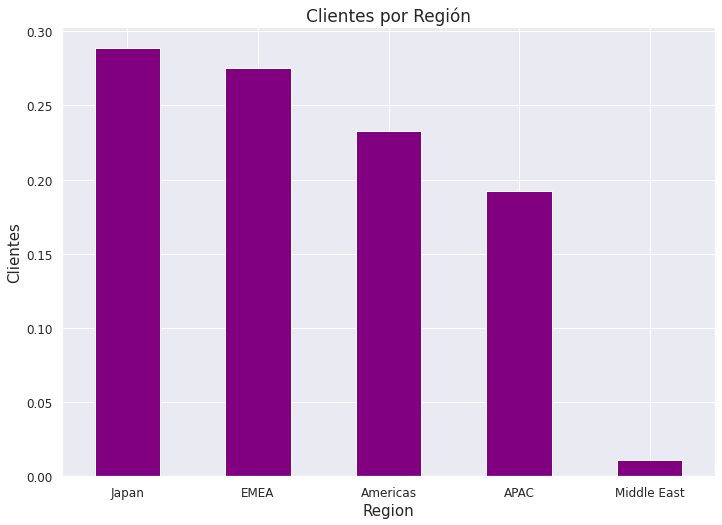

<Figure size 3510x2481 with 0 Axes>

In [ ]:
prob = df_clients.Region.value_counts(normalize=True)
prob.plot(kind='bar',color='purple')
plt.xticks(fontsize=12,rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Clientes', fontsize=15)
plt.title('Clientes por Región', fontsize=17)
plt.figure(dpi=300)

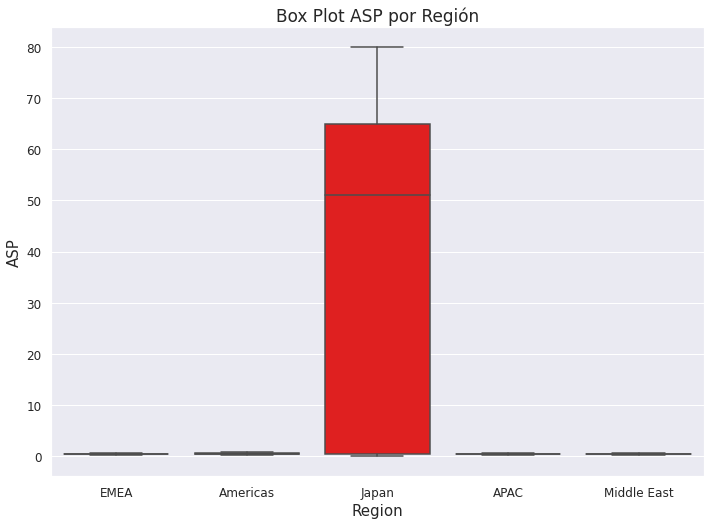

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='Region', y='ASP', data=df_clients, fliersize=0, linewidth=1.5, color="red")
ax.axes.set_title("Box Plot ASP por Región",fontsize=17)
ax.set_xlabel("Region",fontsize=15)
ax.set_ylabel("ASP",fontsize=15)
ax.tick_params(labelsize=12)
